# "어떤 유형의 사람들이 생존할 가능성이 더 높을까?"
## 분석과정
1. 데이터 파일 다운로드
2. 결측치, 이상치 확인 후 제거 또는 변환 + 필요없는 변수 제거
3. 범주형 변수 -> 수치형 변수 변환 + 파생변수 생성
4. 독립변수, 종속변수 나눈 후
5. 훈련용, 테스트 데이터셋 분리
6. 예측 모델 선택

민주
1. 성별에따른 객실등급에따른 나이에따른-->시각화
2. 결측치 처리
3. ..


### 제출 파일 형식:
정확히 418개의 항목과 헤더 행을 포함하는 CSV 파일을 제출해야 합니다. PassengerId및 를 초과하는 열 Survived이나 행이 있는 경우 제출 시 오류가 표시됩니다.

파일에는 정확히 2개의 열이 있어야 합니다.

PassengerId(순서에 상관없이)
Survived(생존은 1, 사망은 0으로 이진 예측이 포함됩니다)

### 함수 memo
1. axis=0: 행, axis=1: 열
2. inplace=True: 원본 df 수정
3. .map(): 다른 값으로 1:1 변환

In [120]:
import pandas as pd

In [121]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

### train데이터 결측치 확인

In [122]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
train["Age"].fillna(train["Age"].median(), inplace=True) #Age의 중앙값으로 결측치 대체

In [124]:
train.dropna(subset=["Cabin"], inplace=True) #너무 많아서 변수가 의미없을 것으로 판단되어 그냥 변수 자체를 삭제

In [125]:
train.dropna(subset=['Embarked'], inplace=True) #2개밖에 안돼서 삭제

In [126]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### train데이터 이상치 확인

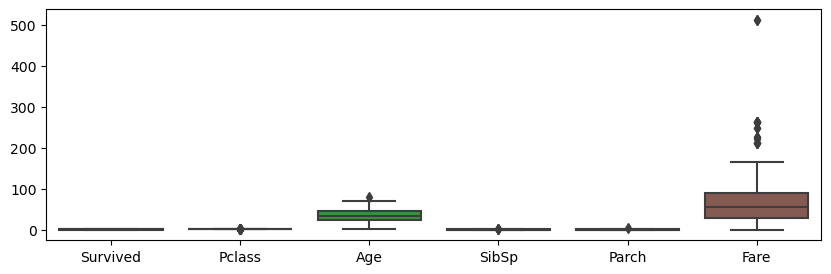

In [127]:
#boxplot으로 이상치 확인

import seaborn as sns
import matplotlib.pyplot as plt

num_cols=train.select_dtypes(include=["int64", "float64"]).drop(columns=["PassengerId"])

plt.figure(figsize=(10, 3))
sns.boxplot(data=num_cols)
plt.show()

In [128]:
#boxplot상, 이상치 있어보이는거 파악하여 진짜인지 확인
age_mean=train["Age"].mean()
age_std=train["Age"].std()
age_outliers=train.loc[(train["Age"]> age_mean + 3*age_std) | (train["Age"] < age_mean - 3*age_std), "Age"]

sibsp_mean=train["SibSp"].mean()
sibsp_std=train["SibSp"].std()
sibsp_outliers=train.loc[(train["SibSp"]> sibsp_mean + 3*sibsp_std) | (train["SibSp"] < sibsp_mean - 3*sibsp_std), "SibSp"]

parch_mean=train["Parch"].mean()
parch_std=train["Parch"].std()
parch_outliers=train.loc[(train["Parch"]> parch_mean + 3*parch_std) | (train["Parch"] < parch_mean - 3*parch_std), "Parch"]

fare_mean=train["Fare"].mean()
fare_std=train["Fare"].std()
fare_outliers=train.loc[(train["Fare"]> fare_mean + 3*fare_std) | (train["Fare"] < fare_mean - 3*fare_std), "Fare"]

In [129]:
fare_outliers.count() #나마지 다 0

2

In [130]:
fare_outliers=fare_mean

### 필요없는 변수 제거

In [131]:
train.drop(columns=["Ticket", "Name"], inplace=True)

### test데이터 결측치 확인

In [132]:
test.isnull().sum() #age, fare, cabin

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [133]:
test["Age"].fillna(test["Age"].median(), inplace=True)

In [134]:
test.dropna(subset=["Fare", "Cabin"], inplace=True)

In [135]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### test데이터 이상치 확인

In [1]:
#boxplot으로 이상치 확인

import seaborn as sns
import matplotlib.pyplot as plt

num_cols=test.select_dtypes(include=["int64", "float64"]).drop(columns=["PassengerId"])

plt.figure(figsize=(10, 3))
sns.boxplot(data=num_cols)
plt.show()

NameError: name 'test' is not defined

In [ ]:
fare_mean=test["Fare"].mean()
fare_std=test["Fare"].std()
fare_outliers=test.loc[(test["Fare"]> fare_mean + 3*fare_std) | (test["Fare"] < fare_mean - 3*fare_std), "Fare"]

In [ ]:
fare_outliers.count()

In [ ]:
fare_outliers=fare_mean

### 필요없는 변수 제거

In [140]:
test.drop(columns=["Ticket", "Name"], inplace=True)

### 범주형 변수, 파생변수 생성

In [141]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# 문자 → 숫자
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [142]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# 문자 → 숫자
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Sex          202 non-null    int64  
 4   Age          202 non-null    float64
 5   SibSp        202 non-null    int64  
 6   Parch        202 non-null    int64  
 7   Fare         202 non-null    float64
 8   Cabin        202 non-null    object 
 9   Embarked     202 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 17.4+ KB


In [144]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 12 to 414
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  91 non-null     int64  
 1   Pclass       91 non-null     int64  
 2   Sex          91 non-null     int64  
 3   Age          91 non-null     float64
 4   SibSp        91 non-null     int64  
 5   Parch        91 non-null     int64  
 6   Fare         91 non-null     float64
 7   Cabin        91 non-null     object 
 8   Embarked     91 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 7.1+ KB


### 독립변수, 종속변수 나누기

In [146]:
# 종속변수 y (정답 레이블)
y = train['Survived']

# 독립변수 X (예측에 사용할 피처들)
X = train.drop(columns=['Survived', 'PassengerId'])  # 생존 여부랑 아이디는 예측에 불필요

### train_test_split

In [147]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(
    X, y,        # 전체 데이터와 라벨
    test_size=0.2,  # 검증용으로 20% 사용
    random_state=42 # 랜덤 고정 (재현 가능성)
)

### 회귀분석? 결정트리? 랜덤포레스트? SVM? --> RF가 가장 많이 사용된다고 함

In [151]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 랜덤 포레스트 모델 생성
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf.fit(X_train, y_train)

# 검증 데이터로 예측
y_val_pred = rf.predict(X_val)

# 정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.4f}')


ValueError: could not convert string to float: 'C50'

In [154]:
from sklearn.metrics import confusion_matrix, classification_report

# 훈련 데이터와 테스트 데이터의 성능 평가
print("Training Data Performance:")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

print("Test Data Performance:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Training Data Performance:


NameError: name 'y_train_pred' is not defined

In [ ]:
pred = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': pred
})

submission.to_csv('submission.csv', index=False)

흠 지난주에 빠져서 어뜨케 되어가고잇는지모르겟음 물어봐야징..ㅜㅜ